In [10]:
# importing rampy
import rampy as rp
# and for numpy we will respect the usual name:
import numpy as np
# for matplotlib
import matplotlib.pyplot as plt
from pydantic import BaseModel

# Experiment 1: Is Plastic VS Glass container

We have to kind of container made from two difference materials (Glass and Plastic).
We want to first see if there any substantial different between them or not.

## 1. Check Noise

We collect 3 noises.

1. System Noise
2. External Noise
3. Nothing Noise
4. Dark (additional)

We expect the (1) and (2) to be the same

In [31]:
class XRange(BaseModel):
    lower_limit:float
    higher_limit:float

def select_range(x_range:XRange, data:np.array) -> np.array:
    cond1 = data[:,0] > x_range.lower_limit
    cond2 = data[:,0] < x_range.higher_limit
    cond = cond1 & cond2
    data = data[cond].copy()
    return data

def load_data(filename:str, x_range:XRange=None,  basepath:str="data") -> np.array:
    # from glob import glob
    import os
    filepath = os.path.join(basepath, f"{filename}")
    if(os.path.exists(filepath) == False):
        raise FileExistsError(f"{filepath=} is not exists")
    spectrum = np.genfromtxt(filepath)
    # Flip X-axis
    spectrum = rp.flipsp(spectrum)
    if(x_range != None):
        assert isinstance(x_range, XRange), f"limit_x must be `XRange`"
        spectrum = select_range(x_range=x_range, data=spectrum)
    return spectrum

x_range = XRange(lower_limit=600, higher_limit=1500)
spectrum = load_data("dark_600_785 nm_360 s_1_2024_02_22_19_30_02_01.txt", x_range=x_range)

## 2. Load Data

In [3]:
spectrum = np.genfromtxt("data/dark_600_785 nm_360 s_1_2024_02_22_19_30_02_01.txt")

Text(0.5, 1.0, 'Fig. 1: the raw data')

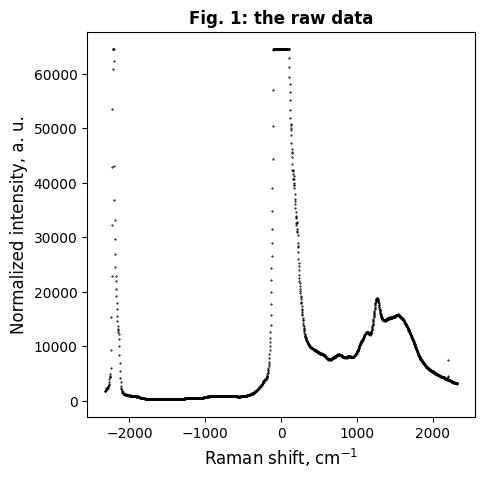

In [4]:
plt.figure(figsize=(5,5))
plt.plot(spectrum[:,0],spectrum[:,1],'k.',markersize=1)
plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 12)
plt.ylabel("Normalized intensity, a. u.", fontsize = 12)
plt.title("Fig. 1: the raw data",fontsize = 12,fontweight="bold")

In [6]:
spectrum_increasing = rp.flipsp(spectrum)

In [7]:
spectrum_increasing

array([[-2324.8 ,  1675.  ],
       [-2321.35,  1746.  ],
       [-2317.91,  1813.  ],
       ...,
       [ 2314.15,  3157.  ],
       [ 2315.68,  3178.  ],
       [ 2317.2 ,  3146.  ]])